In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/dessa

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/dessa


# Dessa Case Competition # 2019
This report is generated for the purpose of exploratory analysis done in order to get a idea for potential kickstrater products.
The report is divided into 2 parts.
The first half is the analysis kickstarter products based on Kaggle survey that includes ~300,000 Kickstarter campaigns in the
past with detailed information, such as project description, funding, success, and etc. The link to the survey data is mentiond below:
https://www.kaggle.com/kemical/kickstarter-projects

The second half of this report anlyses the trends in the cannabis industry over past seven decades in Canada. The rise in consumption of cannabis over past two decades and the legalisation of recreational cannabis nationwide in Canada makes it a potential industry for Dessa to step into.

In [0]:
# importing necessary libraries. Some of the libraries are imported as we proceed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

In [3]:
data = pd.read_csv('kick2018.csv', low_memory = False)
print('shape of data:', data.shape)

shape of data: (378661, 15)


In [0]:
df = pd.DataFrame()
dfca = pd.DataFrame()

In [0]:
df['name'] = data['name']
df['category'] = data['category']
df['main_category'] = data['main_category']
df['country'] = data['country']
df['backers'] = data['backers']
df['goal'] = data['usd_goal_real']
df['pledged'] = data['pledged']
df['state'] = data['state']
df['launched'] = pd.to_datetime(data['launched'])
df['deadline'] = pd.to_datetime(data['deadline'])
dfca = data[data['country']=='CA']
del data

In [6]:
dfca

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.0,failed,0,CA,0.00,0.00,2406.39
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.0,successful,571,CA,43203.25,42174.03,15313.04
40,1000149007,Unschooling To University Book Project,Nonfiction,Publishing,CAD,2018-01-19,3000.0,2017-11-20 18:15:14,592.0,live,24,CA,185.65,472.88,2396.36
65,1000245024,Safer Home,Hardware,Technology,CAD,2015-07-03,50000.0,2015-06-03 05:52:43,0.0,failed,0,CA,0.00,0.00,39739.31
68,1000256760,"Raise the Woof, expanding the love (Canceled)",Design,Design,CAD,2015-08-07,15000.0,2015-07-08 21:46:53,700.0,canceled,6,CA,553.32,535.09,11466.14
85,1000335422,"""Where is Home?"" Anthology",Anthologies,Comics,CAD,2014-07-10,4000.0,2014-06-10 00:09:47,4944.5,successful,153,CA,4523.37,4646.65,3759.05
98,100039820,Best Spray Bottle Ever - SureShot,Gadgets,Technology,CAD,2015-03-07,25000.0,2015-02-05 16:57:21,3.0,failed,3,CA,2.41,2.36,19632.48
104,1000427280,Fishtacular - The Ultimate Fishing Tool (Cance...,Apps,Technology,CAD,2015-05-25,50000.0,2015-04-23 20:04:12,11336.0,canceled,19,CA,9240.74,9110.34,40183.24
170,1000697657,The Forever Rechargeable Talking Super Capacit...,Hardware,Technology,CAD,2013-10-23,2000.0,2013-09-23 23:36:49,656.0,failed,18,CA,636.78,628.47,1916.08
203,1000834930,Strawberry Fields Café and Patisserie,Food,Food,CAD,2017-01-23,50000.0,2016-12-01 21:16:27,0.0,failed,0,CA,0.00,0.00,38112.66


In [7]:
df.category.value_counts()

Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction               9169
Fashion               8554
Nonfiction            8318
Art                   8253
Apparel               7166
Theater               7057
Technology            6930
Rock                  6758
Children's Books      6756
Apps                  6345
Publishing            6018
Webseries             5762
Photography           5752
Indie Rock            5657
Narrative Film        5188
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3912
Hardware              3663
                     ...  
Couture                275
Blues                  268
Animals                255
Fabrication Tools      250
Makerspaces            238
Printing               238
M

In [8]:
df.main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [9]:
df.country.value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [10]:
df.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [0]:
df['success'] = df.pledged >= df.goal

In [12]:
df.success.describe()

count     378661
unique         2
top        False
freq      250247
Name: success, dtype: object

In [0]:
df['duration'] = (df.deadline - df.launched).astype('timedelta64[h]')

In [0]:
# some extra features are engineered that might prove useful
df['pledge_to_goal'] = df.pledged/df.goal
df['pledged_per_backer'] = df.pledged/df.backers
df['pledged_to_duration_ratio'] = df.pledged/df.duration

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


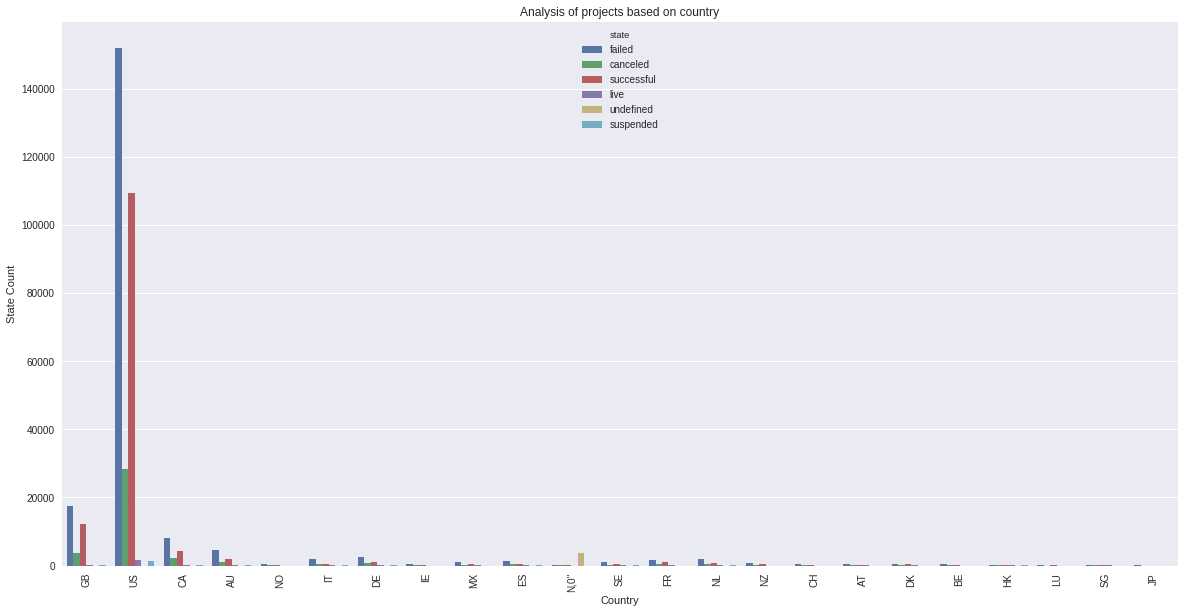

In [15]:
a = plt.figure(figsize=(20,10))
a = sns.countplot(x=df['country'], hue=df['state'])
a.set_xticklabels(labels=df['country'].unique() , rotation = 90)
plt.xlabel('Country')
plt.ylabel('State Count')
plt.title('Analysis of projects based on country')
plt.show()

Text(0.5, 1.0, '#Projects v/s Category')

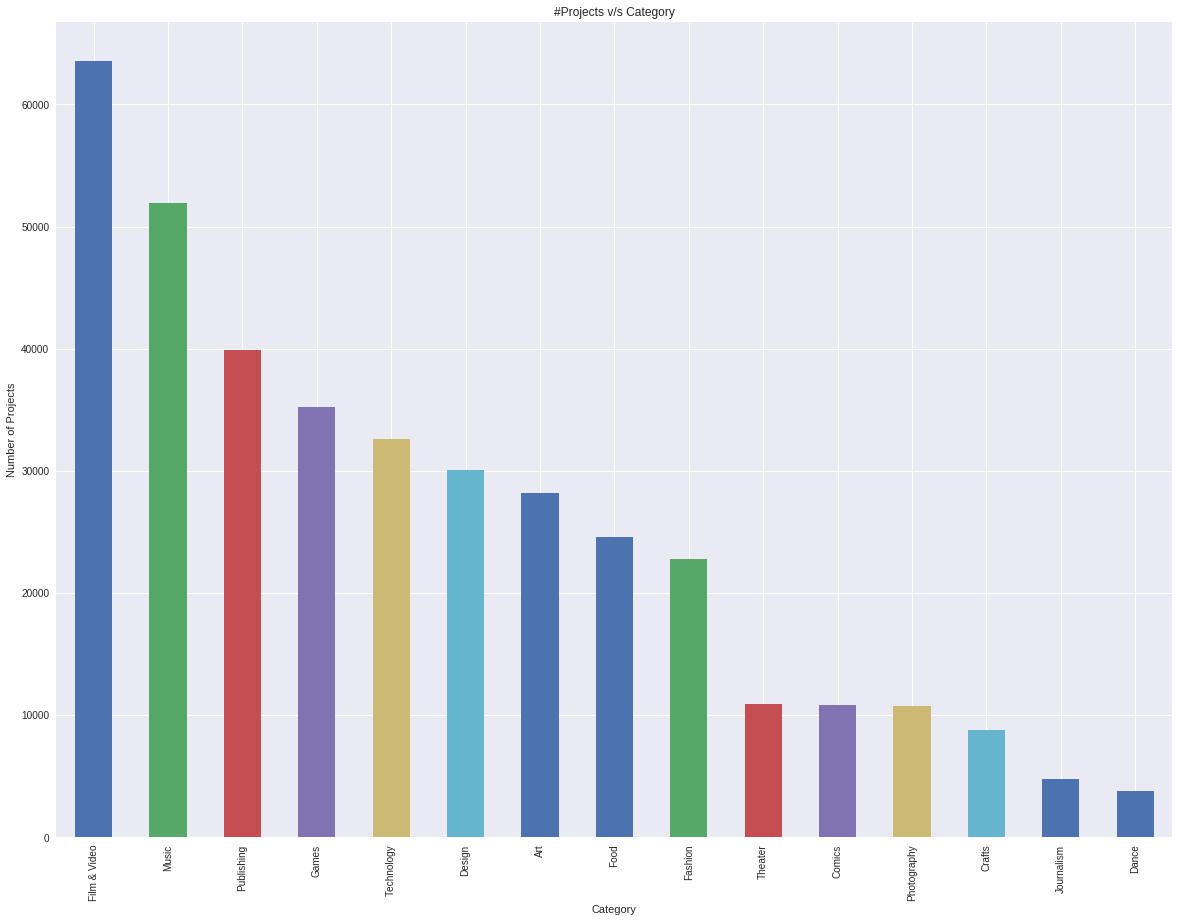

In [16]:
b = plt.figure(figsize=(20,15))
b = df['main_category'].value_counts().plot(kind = 'bar')
plt.xlabel('Category')
plt.ylabel('Number of Projects')
plt.title('#Projects v/s Category')

Text(0.5, 1.0, '#Projects v/s Category')

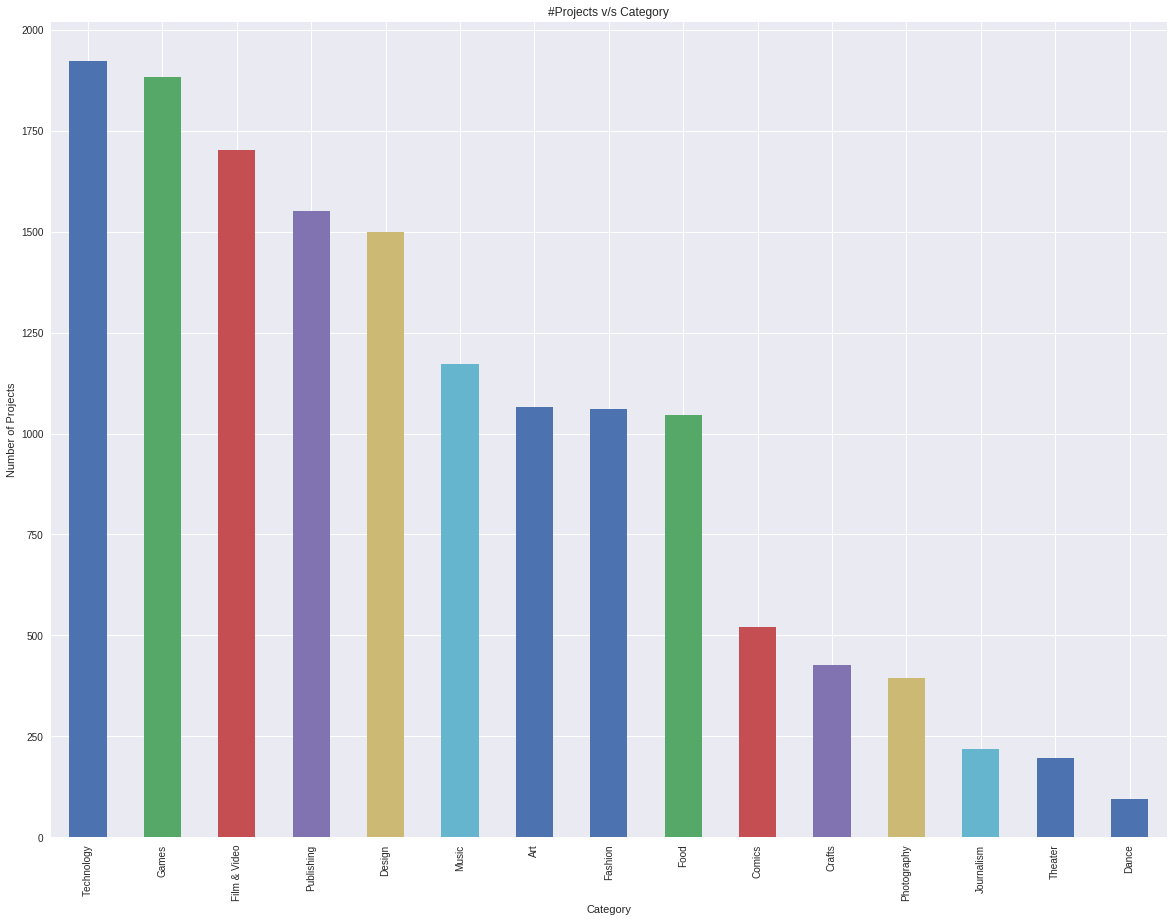

In [17]:
b = plt.figure(figsize=(20,15))
b = dfca['main_category'].value_counts().plot(kind = 'bar')
plt.xlabel('Category')
plt.ylabel('Number of Projects')
plt.title('#Projects v/s Category')

Text(0, 0.5, '# of projects')

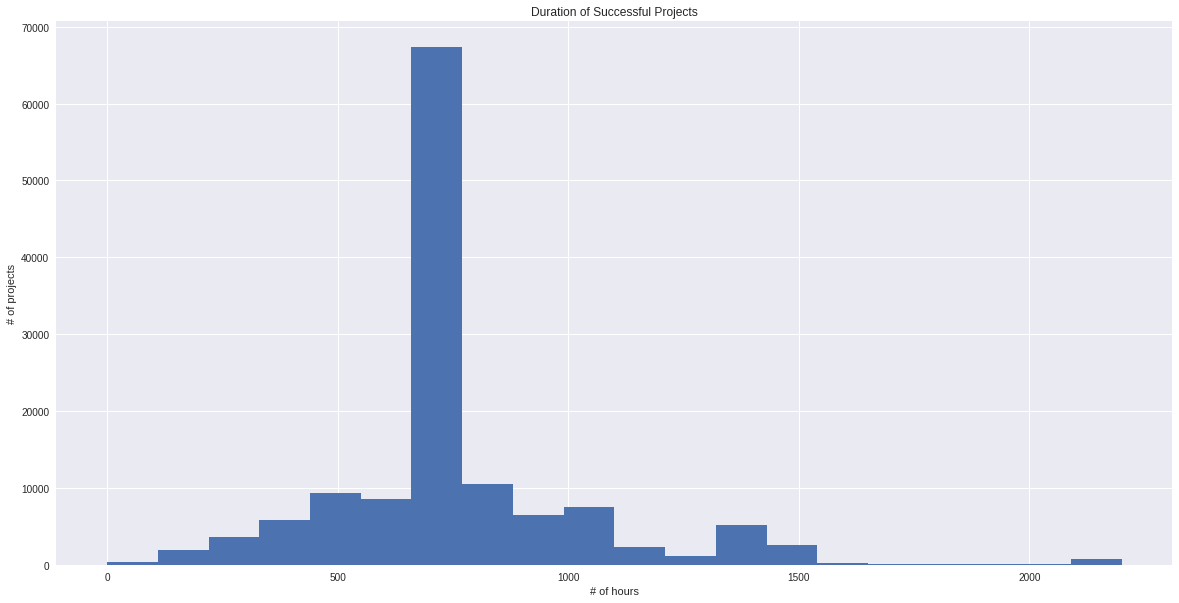

In [18]:
c = plt.figure(figsize=(20,10))
c = plt.hist(df[df.state=='successful'].duration, bins = 20)
plt.title('Duration of Successful Projects')
plt.xlabel('# of hours')
plt.ylabel('# of projects')

Text(0, 0.5, '# of projects')

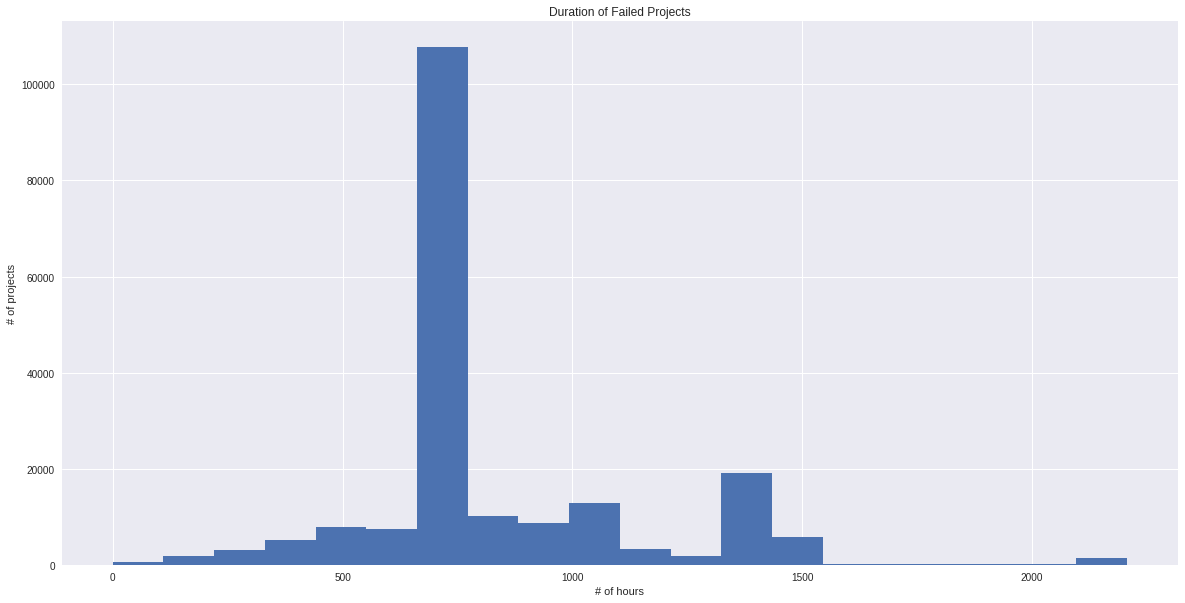

In [19]:
d = plt.figure(figsize=(20,10))
d = plt.hist(df[df.state=='failed'].duration, bins = 20)
plt.title('Duration of Failed Projects')
plt.xlabel('# of hours')
plt.ylabel('# of projects')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


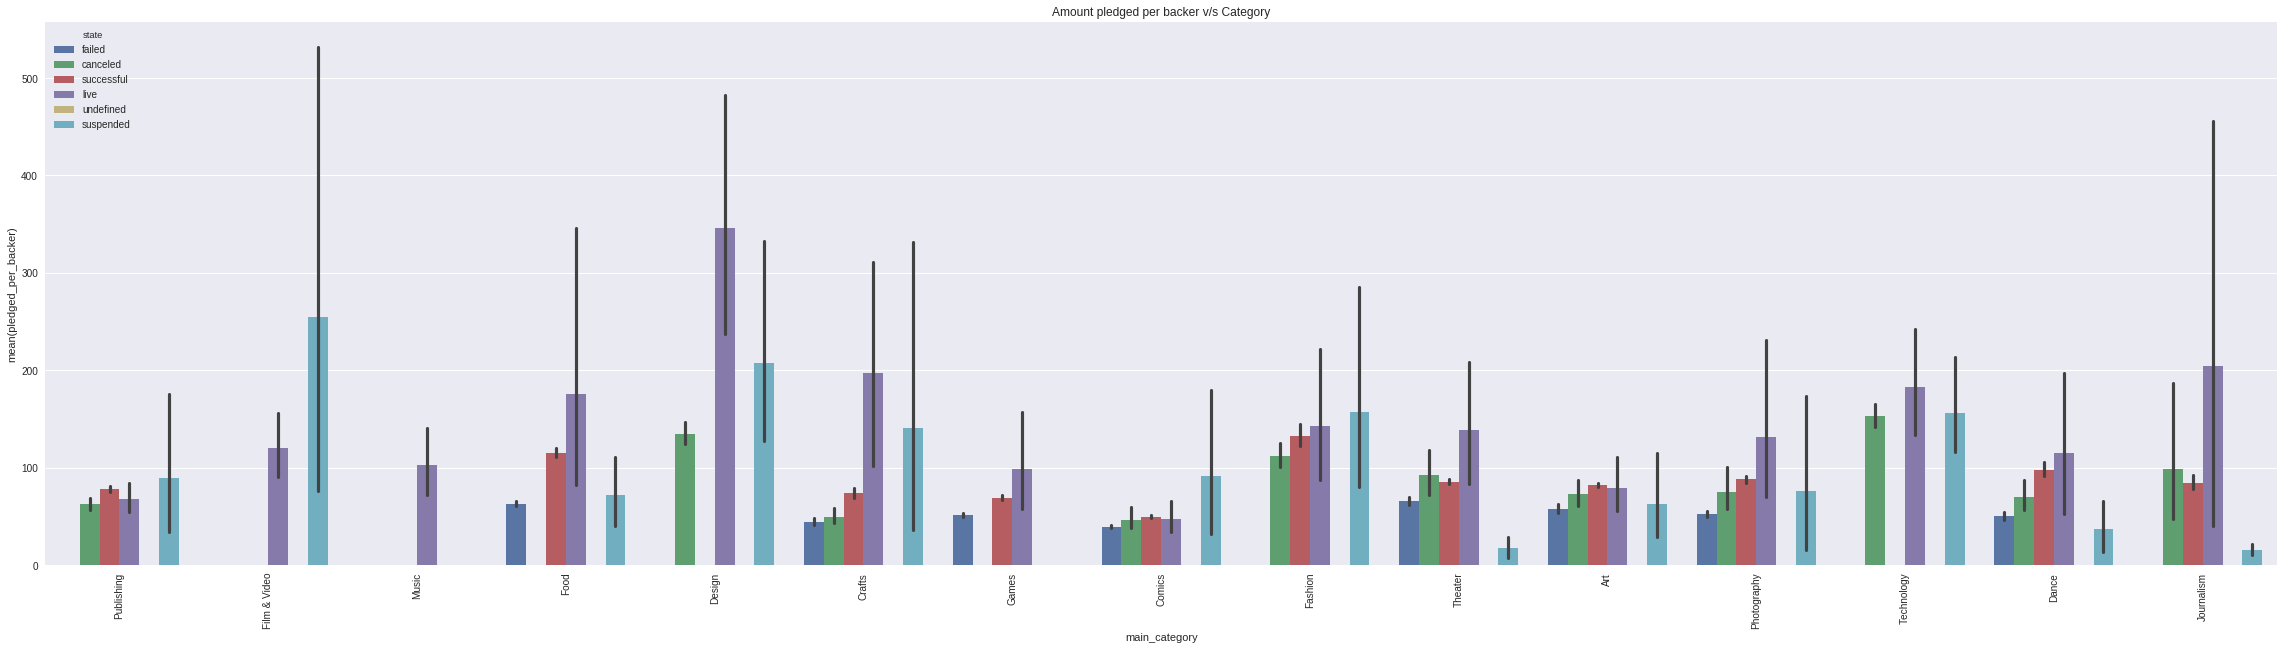

In [20]:
e = plt.figure(figsize=(40,10)) #Intialising the figure with a paticular size
e = sns.barplot(x = df['main_category'] , y = df.pledged_per_backer, hue = df.state) #Plotting the figure
e.set_xticklabels(labels=df['main_category'].unique() , rotation = 90) #Setting the Xlabels
plt.title('Amount pledged per backer v/s Category') 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


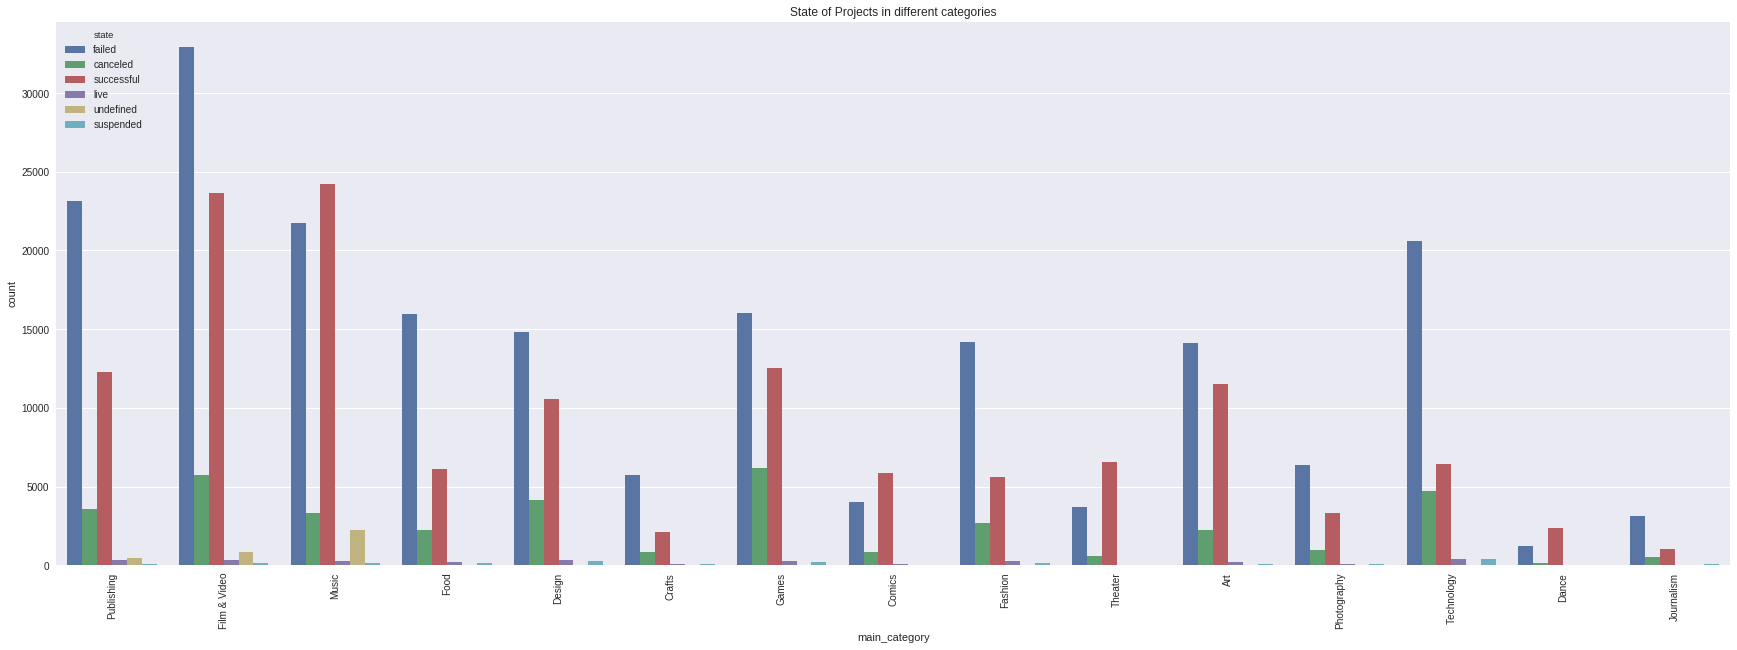

In [21]:
f = plt.figure(figsize=(30,10)) #Intialising the figure with a paticular size
f = sns.countplot(x = df['main_category'] , data = df, hue = df.state) #Plotting the figure
f.set_xticklabels(labels=df['main_category'].unique() , rotation = 90) #Setting the Xlabels
plt.title('State of Projects in different categories') 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


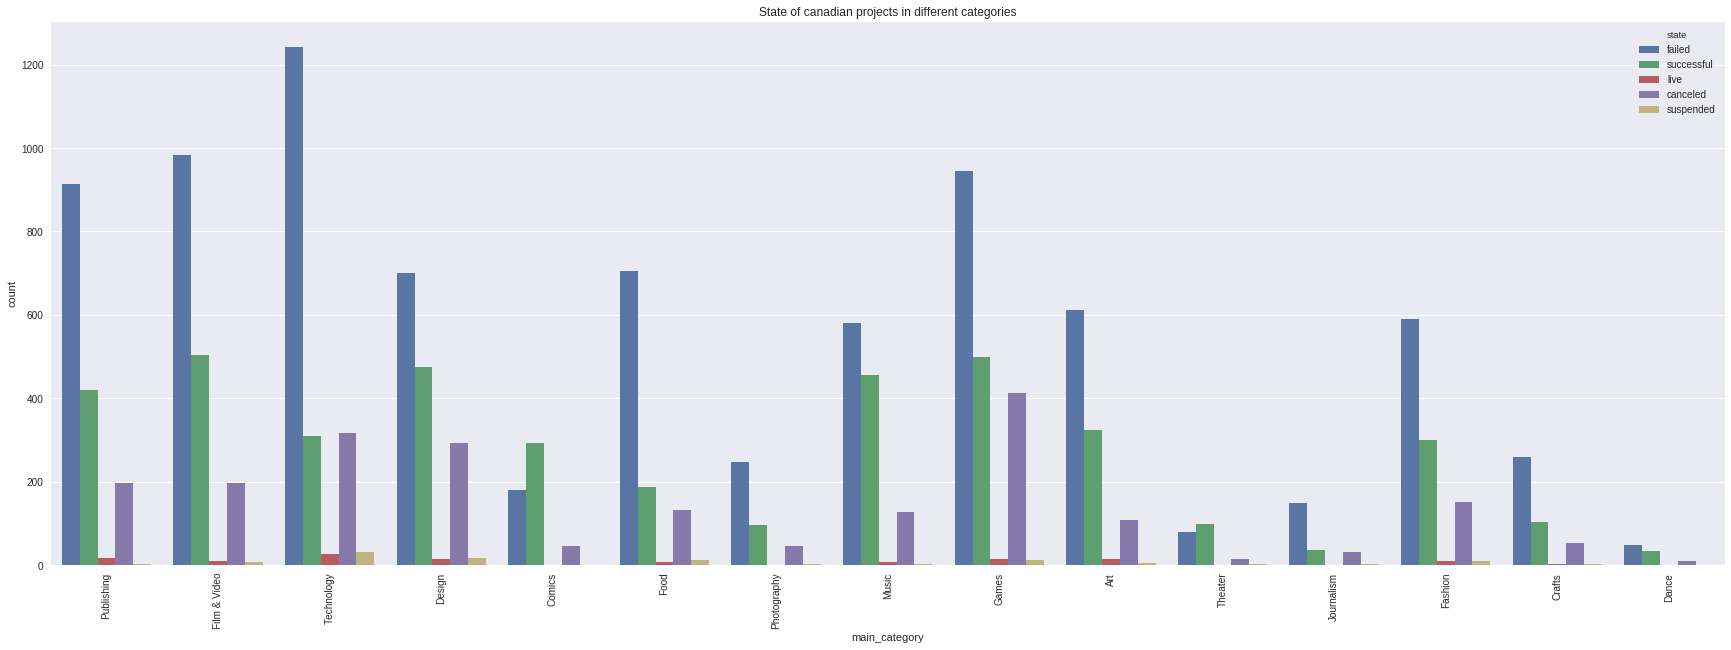

In [22]:
f = plt.figure(figsize=(30,10)) #Intialising the figure with a paticular size
f = sns.countplot(x = dfca['main_category'] , data = dfca, hue = dfca.state) #Plotting the figure
f.set_xticklabels(labels=dfca['main_category'].unique() , rotation = 90) #Setting the Xlabels
plt.title('State of canadian projects in different categories') 
plt.show()

In [23]:
correlation_matrix = df.corr()
correlation_matrix

,backers,goal,pledged,success,duration,pledge_to_goal,pledged_per_backer,pledged_to_duration_ratio
backers,1.000000,0.004517,0.717079,0.130348,-0.000851,0.016648,0.003167,0.704122
goal,0.004517,1.000000,0.005024,-0.022313,0.004176,-0.000468,0.009848,0.004741
pledged,0.717079,0.005024,1.000000,0.117731,0.000802,0.010378,0.111056,0.954403
success,0.130348,-0.022313,0.117731,1.000000,-0.023976,0.017078,0.083857,0.121775
duration,-0.000851,0.004176,0.000802,-0.023976,1.000000,0.000390,0.018480,-0.003876
pledge_to_goal,0.016648,-0.000468,0.010378,0.017078,0.000390,1.000000,0.005433,0.009758
pledged_per_backer,0.003167,0.009848,0.111056,0.083857,0.018480,0.005433,1.000000,0.111084
pledged_to_duration_ratio,0.704122,0.004741,0.954403,0.121775,-0.003876,0.009758,0.111084,1.000000


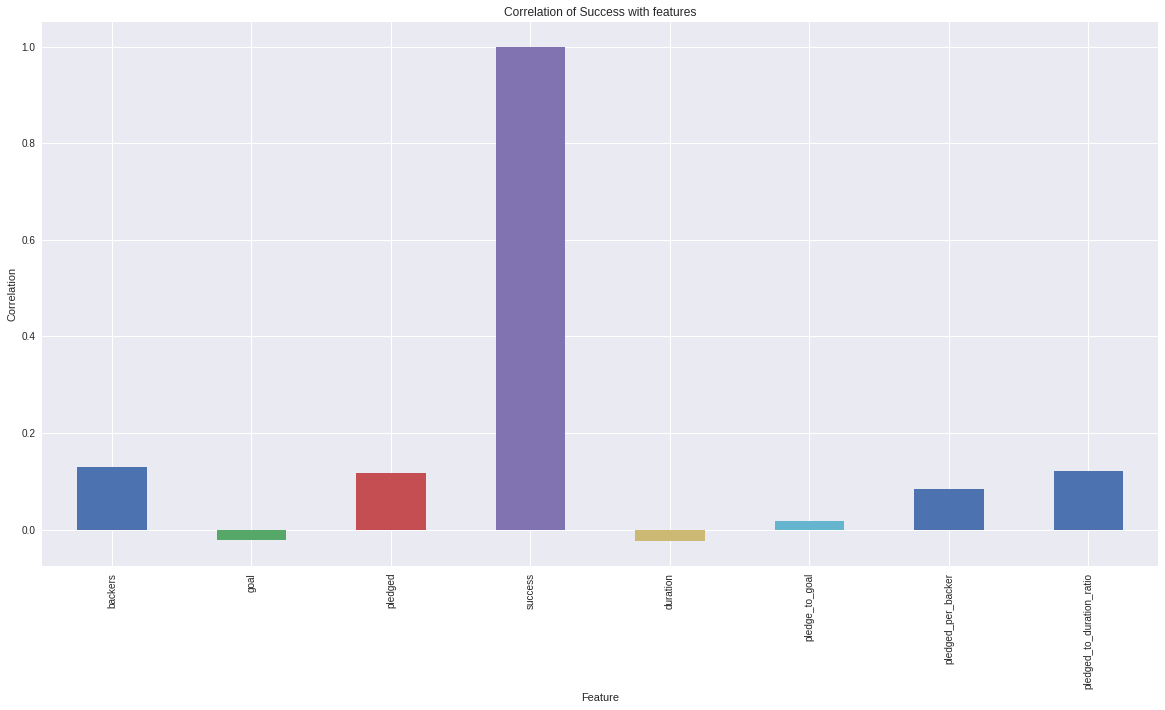

In [24]:
success_cor = correlation_matrix.success
plt.figure(figsize=(20,10))
success_cor.plot(kind = 'bar')
plt.title ('Correlation of Success with features')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

It can be seen here that number of backers, money pledged per backer and pledged to duration ratio are important features in determining the success of a particular project.

In [25]:
print(df.shape)
df = df.dropna()
print(df.shape)

(378661, 15)
(326131, 15)


In [26]:
data = pd.read_csv('can_age.csv', low_memory = False)
print('shape of data:', data.shape)

shape of data: (4176, 17)


In [27]:
data

,REF_DATE,GEO,DGUID,Prevalence,Age group,Frequency of use,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961,Canada,2016A000011124,Consuming population of cannabis,15 years and over,"Total, all frequencies",Persons,249,units,0,v1001799865,1.1.1.1,277512.0,NaN,NaN,NaN,0
1,1961,Canada,2016A000011124,Consuming population of cannabis,15 years and over,Once,Persons,249,units,0,v1001799866,1.1.1.2,17616.0,NaN,NaN,NaN,0
2,1961,Canada,2016A000011124,Consuming population of cannabis,15 years and over,Less than once per month,Persons,249,units,0,v1001799867,1.1.1.3,97880.0,NaN,NaN,NaN,0
3,1961,Canada,2016A000011124,Consuming population of cannabis,15 years and over,One to three times per month,Persons,249,units,0,v1001799868,1.1.1.4,51722.0,NaN,NaN,NaN,0
4,1961,Canada,2016A000011124,Consuming population of cannabis,15 years and over,At least once a week (excludes daily),Persons,249,units,0,v1001799869,1.1.1.5,70428.0,NaN,NaN,NaN,0
5,1961,Canada,2016A000011124,Consuming population of cannabis,15 years and over,Daily,Persons,249,units,0,v1001799870,1.1.1.6,39867.0,NaN,NaN,NaN,0
6,1961,Canada,2016A000011124,Consuming population of cannabis,15 to 17 years,"Total, all frequencies",Persons,249,units,0,v1001799871,1.1.2.1,25976.0,NaN,NaN,NaN,0
7,1961,Canada,2016A000011124,Consuming population of cannabis,15 to 17 years,Once,Persons,249,units,0,v1001799872,1.1.2.2,3826.0,NaN,NaN,NaN,0
8,1961,Canada,2016A000011124,Consuming population of cannabis,15 to 17 years,Less than once per month,Persons,249,units,0,v1001799873,1.1.2.3,8179.0,NaN,NaN,NaN,0
9,1961,Canada,2016A000011124,Consuming population of cannabis,15 to 17 years,One to three times per month,Persons,249,units,0,v1001799874,1.1.2.4,5805.0,NaN,NaN,NaN,0


In [28]:
#columns of relevance: REF_Date, Prevalence, Age group, Frequency of Use, VALUE
data['Prevalence'].unique()
data['Frequency of use'].unique()

array(['Total, all frequencies', 'Once', 'Less than once per month',
       'One to three times per month',
       'At least once a week (excludes daily)', 'Daily'], dtype=object)

In [0]:
df = pd.DataFrame()
df['year'] = data['REF_DATE']
df['prevalence'] = data['Prevalence']
df['age_group'] = data['Age group']
df['frequency_of_use'] = data['Frequency of use']
df['value'] = data['VALUE']
df_all_frequency = df.loc[df['frequency_of_use'] == 'Total, all frequencies']
df_all_frequency = df_all_frequency.dropna()
df_all_frequency_volume = df_all_frequency.loc[df_all_frequency['prevalence'] == 'Volume of cannabis consumed']
df_all_frequency_population = df_all_frequency.loc[df_all_frequency['prevalence'] == 'Consuming population of cannabis']
df_all_frequency_volume = df_all_frequency_volume.drop(columns = ['prevalence', 'frequency_of_use'], axis=1)
df_all_frequency_population = df_all_frequency_population.drop(columns = ['prevalence','frequency_of_use'], axis=1)

df_daily_frequency = df.loc[df['frequency_of_use'] == 'Daily']
df_daily_frequency = df_daily_frequency.dropna()
df_daily_frequency = df_daily_frequency.loc[df_daily_frequency['prevalence'] == 'Consuming population of cannabis']
df_daily_frequency = df_daily_frequency.drop(columns = ['prevalence', 'frequency_of_use'], axis=1)

df_lt1permonth_frequency = df.loc[df['frequency_of_use'] == 'Less than once per month']
df_lt1permonth_frequency = df_lt1permonth_frequency.dropna()
df_lt1permonth_frequency = df_lt1permonth_frequency.loc[df_lt1permonth_frequency['prevalence'] == 'Consuming population of cannabis']
df_lt1permonth_frequency = df_lt1permonth_frequency.drop(columns = ['prevalence', 'frequency_of_use'], axis=1)

#del data, df_all_frequency

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

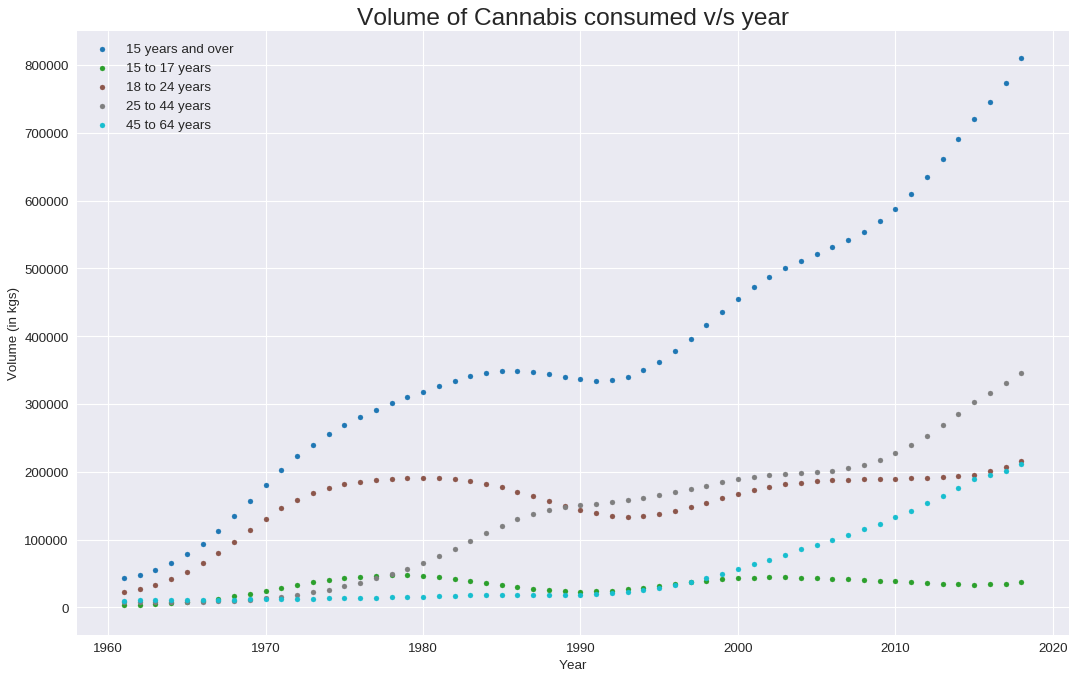

In [30]:
categories = df_all_frequency_volume['age_group'].unique()
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('year', 'value', 
                data=df_all_frequency_volume.loc[df_all_frequency_volume.age_group==category, :], 
                s=20, c=colors[i], label=str(category))

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Volume of Cannabis consumed v/s year", fontsize=22)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Volume (in kgs)", fontsize=12)
plt.legend(fontsize=12)    
plt.show()    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

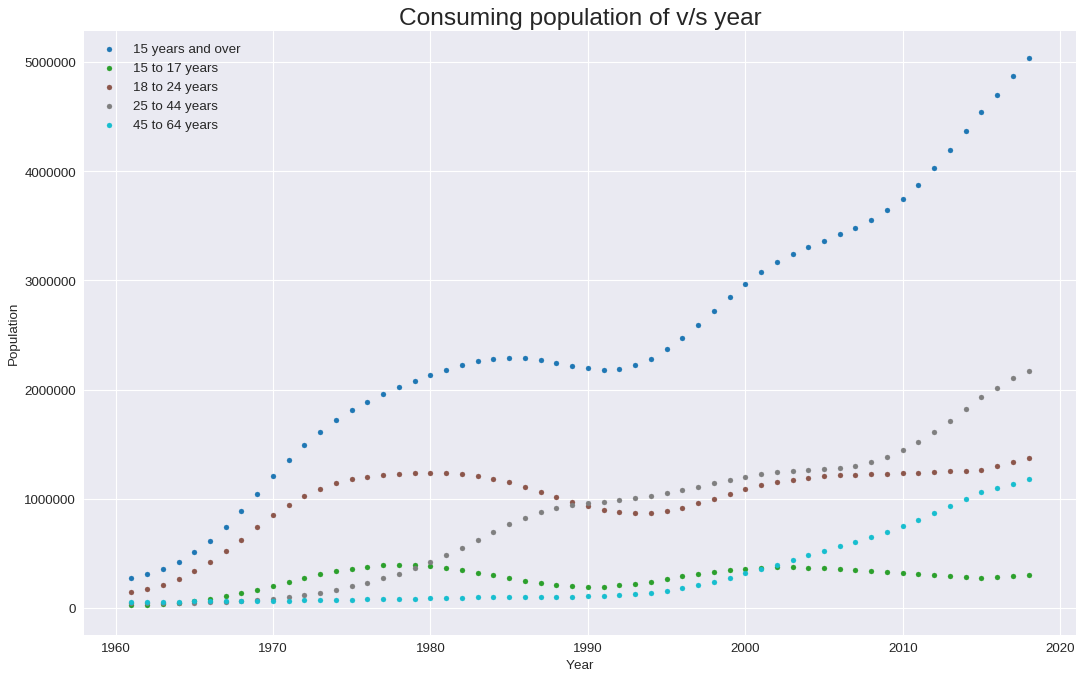

In [31]:
categories = df_all_frequency_population['age_group'].unique()
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('year', 'value', 
                data=df_all_frequency_population.loc[df_all_frequency_population.age_group==category, :], 
                s=20, c=colors[i], label=str(category))

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Consuming population of v/s year", fontsize=22)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend(fontsize=12)    
plt.show()    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

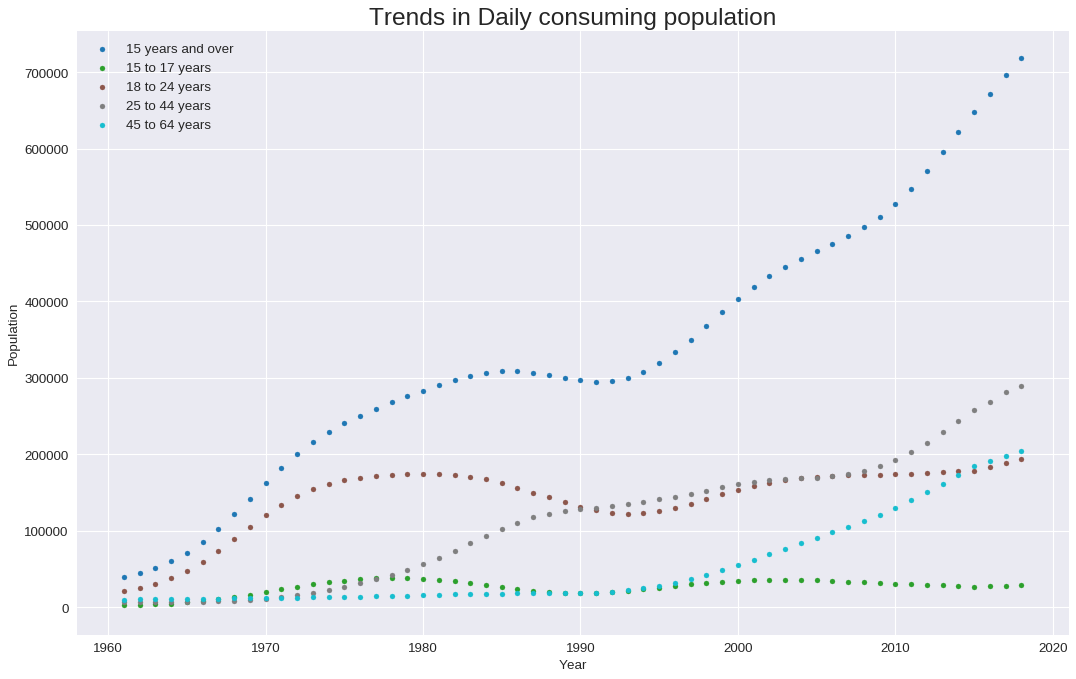

In [32]:
categories = df_daily_frequency['age_group'].unique()
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('year', 'value', 
                data=df_daily_frequency.loc[df_daily_frequency.age_group==category, :], 
                s=20, c=colors[i], label=str(category))

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Trends in Daily consuming population", fontsize=22)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend(fontsize=12)    
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

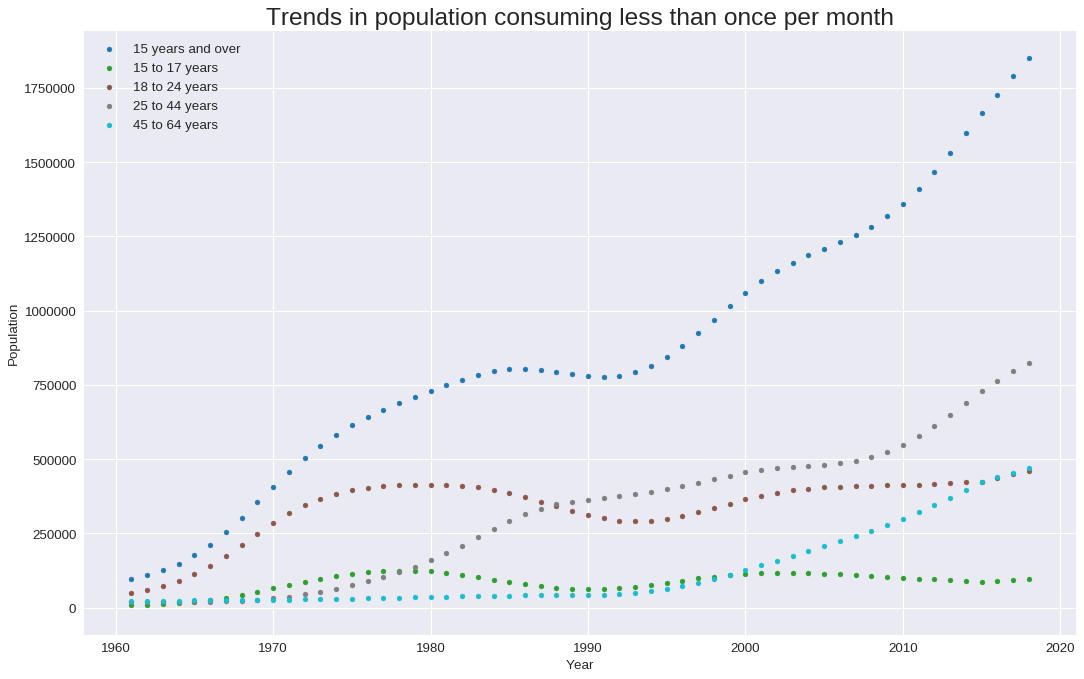

In [33]:
categories = df_lt1permonth_frequency['age_group'].unique()
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('year', 'value', 
                data=df_lt1permonth_frequency.loc[df_lt1permonth_frequency.age_group==category, :], 
                s=20, c=colors[i], label=str(category))

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Trends in population consuming less than once per month", fontsize=22)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend(fontsize=12)    
plt.show()

It can be seen from the analysis above that consumption of cannabis by volume is increasing at a high rate in Canada. Also the number of consumers for cannabis are also increasing. Hence this industry has a great potential for using Machine Learning to help consumers, producers and government.